In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [11]:
dataset = sns.load_dataset('iris')

In [12]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [15]:
df = dataset[['petal_length', 'petal_width']]

df.head(10)

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
5,1.7,0.4
6,1.4,0.3
7,1.5,0.2
8,1.4,0.2
9,1.5,0.1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


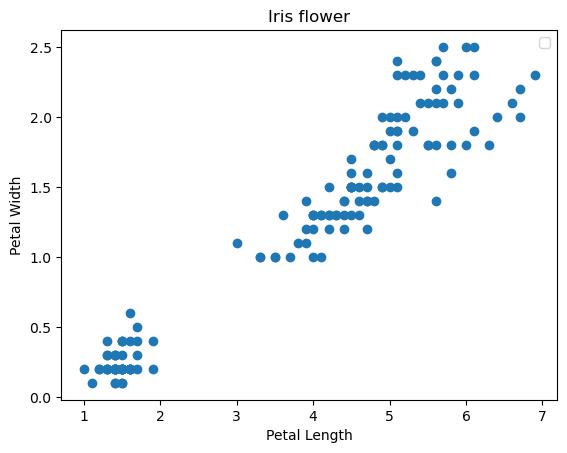

In [18]:
plt.scatter(df.petal_length, df.petal_width);
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris flower')
plt.legend()

In [24]:
k_rng = range(1, 11)
sse = []
for i in k_rng:
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df[['petal_width', 'petal_length']])
    sse.append(km.inertia_)

In [25]:
sse

[550.8953333333334,
 86.39021984551395,
 31.371358974358984,
 19.483000899685116,
 13.91690875790876,
 11.443249546749549,
 9.575942105263161,
 8.661702759114526,
 7.5804124331550815,
 7.008611545317428]

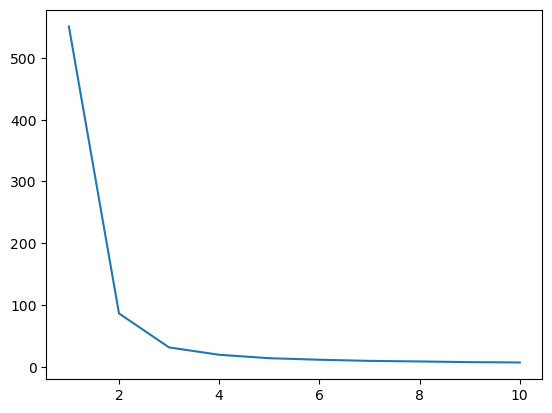

In [26]:
plt.plot(k_rng, sse)

In [31]:
km = KMeans(n_clusters=3, init='k-means++', random_state=42)


In [32]:
y_predicted = km.fit_predict(df[['petal_length', 'petal_width']])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [33]:
df['cluster'] = y_predicted

df

/tmp/ipykernel_17950/1805589911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = y_predicted


,petal_length,petal_width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


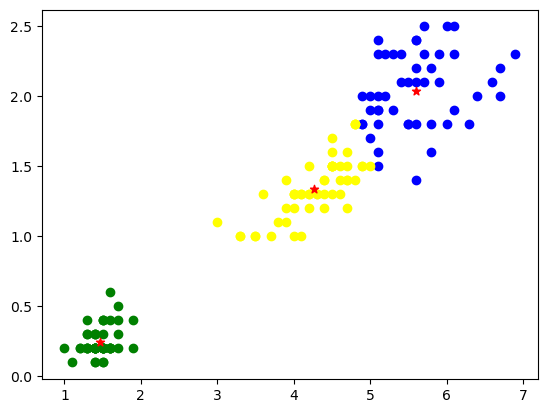

In [35]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
plt.scatter(df0['petal_length'], df0['petal_width'], c='blue')
plt.scatter(df1['petal_length'], df1['petal_width'], c='green')
plt.scatter(df2['petal_length'], df2['petal_width'], c='yellow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='red', marker='*')
